## Logistic regression 구현 과제 _ 최혜빈

저는 주어진 틀 그대로 사용하여 구현하였습니다!

# Logistic Regression 구현
1) 제가 제시한 틀을 사용하여 구현을 할 필요는 없습니다. 원하시는 대로 구현하시면 됩니다.  
2) 단, code copy는 허용하지 않습니다. 코드 주석을 꼭 상세히 달아주세요. 주석이 부족한 경우, 미제출로 간주합니다.

### None 값을 채워주세요!!!!!

In [69]:
import math, random
from functools import partial,reduce
from assignment2 import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
"""
data 설명
1) Label: 유료 계정 등록 여부(target)
2) bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)
3) experience: 근속연수
4) salary: 연봉

어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.
"""

In [70]:
data = pd.read_csv('assignment_2.csv')

In [71]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


### 0. Gradient Descent

In [72]:
def step(v, direction, step_size):
    """
    한 지점에서 step size만큼 이동하는 step 함수를 구현하세요.
    v와 direction은 벡터.
    """
    
    #여기서 v는 theta값을 말하고, direction은 gradient값을 말한다 
    #stepsize는 learning rate를 말한다 learning rate란 변화하는 데이터에 얼마나 빠르게 적응할 것인가를 말하는데
    #이 값이 너무 크면 overshooting이 일어날 것이고 너무 작으면 느리게 학습될 수 있으므로 적당한 값이 필요하다
    #stepsize에 따라 달라진 값을 return한다
    return [v_i + step_size * direction_i for  v_i, direction_i in zip(v,direction)] #v와 direction이 벡터형태이므로 for문을 사용하였습니다

In [73]:
def safe(f) :
    """
    f에 대한 예외처리를 위한 함수(f가 infinite일 때)
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [74]:
def minimize_bgd(target_fn, gradient_fn, theta_0, tolerance = 0.0001): # bgd: batch gradient descent
    """
    목적함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾는다.
    """
    #gradient descent진행하기
    #경사하강법은 초기세타값에서 목적함수 높은 부분에서 경사가 낮은 방향으로 세타값을 지속적으로 수정해서
    #목적함수가 가장 낮은 부분까지 도달하게 만든다
    #즉 목적함수를 최소화하는 세타값을 구해내는 것이다
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    #step_size는 적절한 stepsize값을 찾기 위해 여러 값들을 리스트로 지정해둠
    
    # 시작점 설정
    theta = theta_0
    target_fn = safe(target_fn) # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta) # 최소화시키려는 값
    
    while True:
        gradient = gradient_fn(theta) # gradient값 계산
        #### update thetas --> 각 step sizes에 따른 theta값을 list형태로 리턴
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        #앞서 정의한 step함수를 사용한다. 앞에서 설명했듯이 step함수에서 v는 theta, direction은 gradient였는데
        #이 함수를 사용하여 theta값을 정의한다
        #앞서 step_size를 여러 값을 담은 리스트로 정의하였기 때문에 가장 적절한 stepsize를 사용하기 위해
        #for문을 사용한다
        
        
        # 함수를 최소화시키는 theta 선택
        #목적함수는 가장 최소값의 theta값을 찾는 함수이다 obj에는 앞서 정의한 next_thetas를 대입한다
        obj = next_thetas 
        key = target_fn
        
        #gradient descent가 목적함수를 최소화시키는 theta를 찾아가는 과정이므로
        #계속해서 theta값이 update되어야 한다 
        #업데이터한 다음 theta값을 이와같이 정의한다
        next_theta = min(obj, key = key)
        
        #next value는 구한 theta값을 target function에 대입한 값이다
        next_value = target_fn(next_theta)
        
        # tolerance만큼 수렴하면 멈추도록 하는데
        #tolerance는 임계치로, 
        #temp와 tolerance값을 비교하여 이전 value값과 next_value값이 거의 변화가 없어진다면 학습을 멈추도록 한다
        temp = abs(value - next_value)
    
        if temp < tolerance:
            return theta
        else: #### 어떻게 업데이트 시킬지 채워넣으세요
            #새로운 세타를 재정의해준다!
            theta,value = next_theta,next_value
           
            #결국 temp값이 tolerance보다 작아지기 전까지 계속해서 학습을 진행하고
            #세타값과value값은 계속 경사하강법을 이용해 업데이트 됩니다
        

In [75]:
def stochastic():
    """
    sgd 구현 (추가적인 부분이니 필수는 아닙니다.)
    random sampling 하는 부분(함수로 따로 구현하셔도 ok) + gd 부분
    """

### 1. 로지스틱 함수
해당 함수는 1/(1+exp[-(ax+b)]로 표현되었음을 기억합시다.

In [76]:
def logistic(x):
    #sigmoid function을 참고하여 logistic 함수를 정의해준다
    #해당 함수는 1/(1+exp[-(ax+b)]이므로
    #return값을 아래와 같이 작성하였습니다
    try:
        return 1.0 / (1 + math.exp(-x))
    except:
        return 1e-9 #분모가 0인값이 나올 경우를 대비하여 이와 같은 except로 따로 설정하였습니다


In [77]:
#softmax function을 사용하는 이유는 결과를 확률값으로 해석하기 위함인데
#softmax를 사용하면 모든 합이 1이 되므로 어떠한 레이블의 확률이 높아지면 다른 레이블이 가지는 확률값은 그에 따라 내려간다
#즉 softmax의 사용은 normalization의 효과를 얻는다
def softmax(v):
    """
    softmax 구현
    """
    #softmax function의 수식은 모든 레이블에 대한 시그모이드 값을 더한 값을 각 레이블에 대한 시그모이드 값으로 나누는 수식이다
    #강의자료에 있는 수식을 참고하여 완성하였습니다
    #분모자리에 들어갈 값을 먼저 만들고
    #return값 자리에 수식을 완성하였습니다
    summation = sum([math.exp(v_i) for v_i in v])
    return [math.exp(v_i)/summation for v_i in v]

### 2. Likelihood 구현
그냥 Likelihood function 대신, log likelihood function을 이용해서 구현하세요.

In [78]:
#목적함수 구현하기
#앞서 적절한 theta값을 찾기 위해서 그 목적함수를 구현해야하는데
#이 계수를 알아내는 방법을 maximum likelihood estimation이라 한다
#likelihood를 최대화하는 parameter를 추정하는 것으로 이것을 최대화하기 위해서는
#미분을 해서 0이 되는 값을 찾아야 하는데 매우 불편하기 때문에
#일반적으로 log를 취해서 사용하고 이를 log likelihood라고 합니다!

def logistic_log_likelihood_i(x_i, y_i, beta): # 개별 데이터포인트에 대한 likelihood 값
    """
    해당 함수에 대한 설명을 작성하고,
    리턴문을 채우세요.
    """
    #log likelihood function의 경우 수식에서 확인할 수 있듯이
    #y값이 0이면 앞의 식이 사라져 뒷부분만 남고, 1이면 뒤의 식이 0이 되어 사라져 앞부분만 남습니다
    #그러므로 아래와 같이 코드를 완성하였습니다
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1-logistic(dot(x_i,beta))+1e-10) 
    #log안에 들어갈 값이 0이 되는 것을 대비해 뒤에 아주 작은 수를 대입하였습니다
    

In [79]:
def logistic_log_likelihood(x,y,beta): # 전체 데이터에 대한 likelihood
    """
    함수의 인자를 채워넣고,
    zip 함수를 이용하여 return 문을 완성하세요.
    """
    
    #이 함수는 바로 위에서 구했던 개별 데이터포인트를 위한 log likelihood function을 사용해
    #전체 데이터에 대한 likelihood를 구하는 function 입니다
    #x,y은 많은 데이터가 들어있는 벡터형태의 데이터이므로 zip함수와 for문을 이용해 구합니다
    return sum(logistic_log_likelihood_i(x_i,y_i,beta) for x_i,y_i in zip(x,y))

### 3. Gradient for Log Reg
아래 3가지 함수에 대해 해당 함수의 인자와 기능을 자세히 설명하세요.

In [80]:
#3번 4번의 경우 공지방에 올라온 모범답안을 참고하여 작성하였습니다

#앞의 과정들을 통해 모든 데이터들에 대한 목적함수 log likelihood function을 구했고
#그 식을 gradient descent를 통해 최적화하게 될텐데 아래의 식들은 그 gradient descent를 위한
#각각의 베타들에 대한 gradient를 구하는 함수들이다


def logistic_log_partial_ij(x_i, y_i, beta, j):
    """
    특정 데이터 x_i에 대한 beta_j의 gradient 값 --> 상수 형태의 리턴값
    """
   #아래의 그림을 참고해 보면 베타
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]
#목적함수를 각각의 모든 인덱스 j에 대해 편미분을 진행하는데 
#아래의 그림을 참고하면 최종 식을 확인했을 때 return값은 이와 같이 나온다
#이 함수를 통해 특정 데이터 x_i에 대한 beta_j의 gradient값을 구할 수 있다

def logistic_log_gradient_i(x_i, y_i, beta):
    """
    x_i(row)에 대한 beta의 gradient 값(column 개수만큼) --> 리스트 형태의 리턴값을 가짐
    """
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]
#이 함수의 경우 위의 함수에 이어지는 것으로, 위의 편미분을 위한 함수의 경우 특정 데이터에 대한 gradient 값들을 리턴값으로 받으므로
#상수 형태로 받았다면, enumerate 함수를 이용하여 리스트 형태의 리턴값을 가지게 된다


#편미분으로 gradient를 구하는 과정이다

def logistic_log_gradient(x, y, beta):
    """
    전체 데이터에 대한 beta의 gradient 값 
    --> 이중 리스트를 vector_add 시켜서 beta_j에 대한 gradient값들을 rowSum 해놓은 리스트를 리턴
    """  
    return reduce(vector_add, [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])

#결국은 이 세 함수가 서로 연결연결되어서 전체 데이터에 대한 beta의 gradient를 구하려고 하는 건데, 
#바로 위의 함수를 또 그대로 가져와 x의 row에 따라 구한 beta의 gradient를 for문을 이용하여 x,y 전체 데이터에 대한 gradient를 최종적으로 구한다

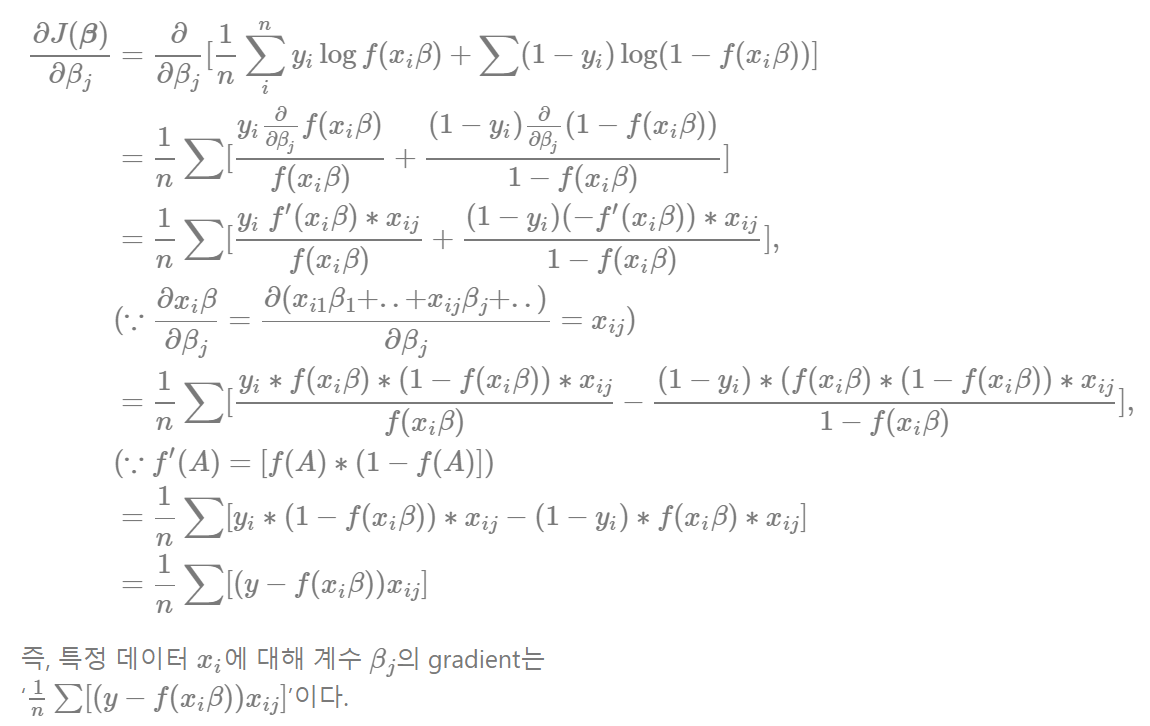

In [81]:
from IPython.display import Image
Image("image.png")  #참고 이미지!

### 4. Model Fitting
위에서 구현한 log likelihood를 이용하여 Model을 Fitting 시켜보세요.  
앞서 우리는 log likelihood를 maximize하는 방향으로 회귀계수를 추정한다고 배웠습니다.  
Gradient Descent는 경사 "하강법"으로 최솟값을 찾는 데에 사용되는 알고리즘입니다.  
따라서 log likelihood를 적절히 변형을 해야 Gradient Descent 코드를 적용할 수 있습니다.  
log likelihood 변형 함수는 assignment2.py에 구현되어있으니, None값만 채워주시면 됩니다.

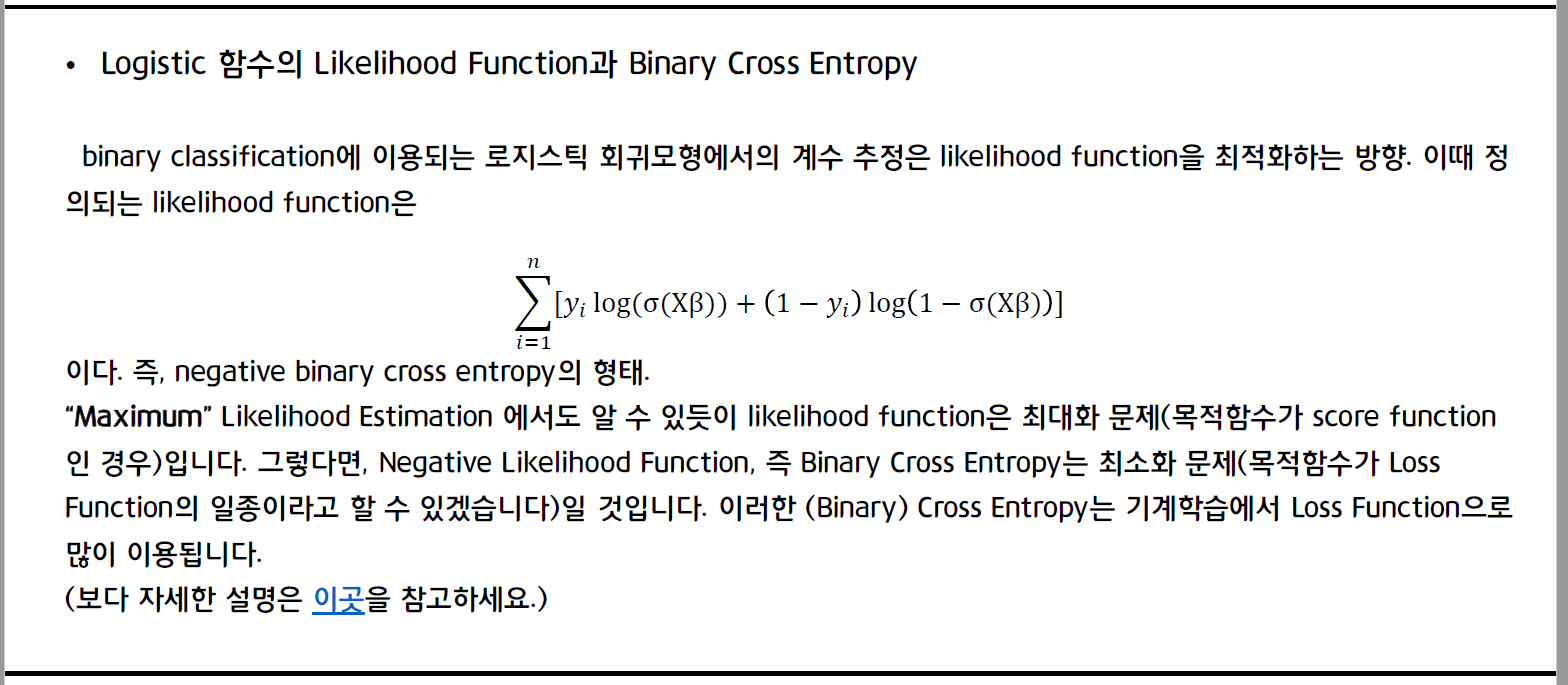  
https://curt-park.github.io/2018-09-19/loss-cross-entropy/

In [82]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


In [83]:
X = data.drop('Label', axis = 1)
y = data['Label']
#logistic regression을 하기위해 x와 y를 설정해줍니다

In [84]:
#X와y는 matrix형태로 변환해줍니다
X = X.as_matrix()
y = y.as_matrix()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
X[:10] #X가 데이터 스케일링이 필요함을 확인

array([[1.0e+00, 7.0e-01, 4.8e+04],
       [1.0e+00, 1.9e+00, 4.8e+04],
       [1.0e+00, 2.5e+00, 6.0e+04],
       [1.0e+00, 4.2e+00, 6.3e+04],
       [1.0e+00, 6.0e+00, 7.6e+04],
       [1.0e+00, 6.5e+00, 6.9e+04],
       [1.0e+00, 7.5e+00, 7.6e+04],
       [1.0e+00, 8.1e+00, 8.8e+04],
       [1.0e+00, 8.7e+00, 8.3e+04],
       [1.0e+00, 1.0e+01, 8.3e+04]])

In [86]:
from sklearn.model_selection import train_test_split
import random

In [87]:
random.seed(0)
#scaling전에 각각 train set과 test set을 분리하여 줍니다
#train set은 학습에만 사용하는 데이터 셋이고
#test set은 모델이 한번도 본 적 없는 데이터를 가지고 공정한 학습 평가를 하기위한 데이터 셋입니다

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [88]:
#math range error 발생을 막기 위해 스케일링을 해줍니다
from sklearn.preprocessing import StandardScaler

In [89]:
ss = StandardScaler()
#train,test set으로 나눈 두 데이터셋을 스케일링 해줍니다
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [90]:
#두 데이터 셋 모두 bias term을 추가하였습니다
for i,_ in enumerate(X_train_scaled):
    X_train_scaled[i][0] =1
    
for i,_ in enumerate(X_test_scaled):
    X_test_scaled[i][0] =1

In [91]:
# 아래에 Model Fitting 진행
from functools import partial # partial을 이용해 fn과 gradient_fn 구현
fn = partial(logistic_log_likelihood,X_train_scaled,y_train)
gradient_fn = partial(logistic_log_gradient, X_train_scaled,y_train)
#최적의 beta값을 찾기 위해 경사하강법을 진행하는데
#앞서 구현한 경사하강법 함수에서 필요한 인자에 target_fn, gradient_fn를 먼저 정의합니다
#스케일링한 x_train, y_train data set을 아까 구현한 logistic log likelihood 목적함수와 gradient 함수를 이용해
#fn, gradient_fn을 구합니다
#이때 사용하는 partial 함수는 함수를 재사용할 수 있는 장점을 이용하기 위해 사용하였습니다

#베타 초기값은 ransom으로 지정하도록 합니다
beta_0 = [random.random() for _ in range(3)] # 임의의 시작점

# 경사 하강법으로 최적화

#잎서 구현해둔 경사하강법을 이용해 최적의 beta값을 구합니다
beta_hat = minimize_bgd(neg(fn), neg_all(gradient_fn), beta_0)


In [92]:
beta_hat #train set을 이용해 구한 최적의 beta값들 입니다

[-1.8051524024050936, 4.16840380790497, -3.84194333807058]

In [ ]:
#Valid한 결과인지 확인 - accuracy 값을 찍어봅니다

In [93]:
#공지방에 올라온 모범 답안을 참고하였습니다
def calc_accuracy(x_test, y_test, theta, threshold = 0.5):
    true_positives = false_positives = true_negatives = false_negatives = 0

    # threshold: 0.5
    for x_i, y_i in zip(x_test, y_test):# x_i: i번째 row, y_i: i번째 label
        predict = logistic(dot(x_i, theta))

        if y_i == 1 and predict >= threshold: # y_i == 1 & pred >= .5: 실제값 1 and 예측 1 (TP)
            true_positives += 1
        elif y_i == 1: # y_i == 1 & pred < .5: 실제값 1 but 예측 0 (FN)
            false_negatives += 1
        elif predict >= 0.5: # y_i == 0 & pred >= 0.5: 실제값 0 but 예측 1 (FP)
            false_positives += 1
        else: # y_i == 0 & pred < 0.5: 실제값 0 and 예측 0 (TN)
            true_negatives += 1
    #여기서 구한 accuracy는 performance evaluation for classification부분을 이용한 것이고
    #accuracy값은 (TP + TN)/(TP + FN + FP + TN)이 됩니다

    accuracy = (true_positives + true_negatives) / (true_positives+false_negatives+false_positives+true_negatives)
    return accuracy

accuracy = calc_accuracy(X_test_scaled, y_test, beta_hat)

print("accuracy for batch gradient descent: {}".format(accuracy))


accuracy for batch gradient descent: 0.8939393939393939
